In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [2]:
x = []
y = []

for i in range(10):
    lst = list(range(i, i+4))
    x.append(list(map(lambda c: [c/10], lst)))
    y.append((i+4)/10)
    
X = np.array(x)
Y = np.array(y)

for xi, yi in zip(x, y):
    print(xi, yi)

[[0.0], [0.1], [0.2], [0.3]] 0.4
[[0.1], [0.2], [0.3], [0.4]] 0.5
[[0.2], [0.3], [0.4], [0.5]] 0.6
[[0.3], [0.4], [0.5], [0.6]] 0.7
[[0.4], [0.5], [0.6], [0.7]] 0.8
[[0.5], [0.6], [0.7], [0.8]] 0.9
[[0.6], [0.7], [0.8], [0.9]] 1.0
[[0.7], [0.8], [0.9], [1.0]] 1.1
[[0.8], [0.9], [1.0], [1.1]] 1.2
[[0.9], [1.0], [1.1], [1.2]] 1.3


In [3]:
rnn = Sequential([
    layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    layers.Dense(1)
])

rnn.summary()

2022-07-28 14:47:28.325099: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-28 14:47:29.487300: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9991 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1
2022-07-28 14:47:29.488345: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 10402 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:04:00.0, compute capability: 6.1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [4]:
rnn.compile(optimizer='SGD', loss='mse')
rnn.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 3.0718
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 2.2014
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 1.5794
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 1.1380
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 0.8278
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 0.6113
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 0.4605
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 0.3552
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 0.2813
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 0.2291


In [5]:
print(rnn.predict(np.array([[[1.5],[1.6],[1.7],[1.8]]]))) # 1.9
print(rnn.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]]))) # 0.3

[[0.21179512]]
[[0.6286109]]


In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense

In [9]:
max_vocab = 10000
maxlen = 500
batch_size = 128

In [10]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_vocab)
print(len(input_train), len(input_test))

17473536/17464789 [==============================] - 2s 0us/step
25000 25000


In [11]:
print(input_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [12]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print(input_train.shape, input_test.shape)

(25000, 500) (25000, 500)


In [13]:
model = Sequential()
model.add(layers.Embedding(max_vocab, 100))
model.add(layers.LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1000000   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2022-07-28 15:23:13.132614: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8401


157/157 [==============================] - 8s 36ms/step - loss: 0.4774 - acc: 0.7750 - val_loss: 0.3403 - val_acc: 0.8614
Epoch 2/10
157/157 [==============================] - 5s 33ms/step - loss: 0.2879 - acc: 0.8831 - val_loss: 0.3055 - val_acc: 0.8818
Epoch 3/10
157/157 [==============================] - 5s 33ms/step - loss: 0.2256 - acc: 0.9160 - val_loss: 0.3040 - val_acc: 0.8714
Epoch 4/10
157/157 [==============================] - 5s 32ms/step - loss: 0.1970 - acc: 0.9277 - val_loss: 0.4042 - val_acc: 0.8432
Epoch 5/10
157/157 [==============================] - 5s 33ms/step - loss: 0.1694 - acc: 0.9400 - val_loss: 0.3983 - val_acc: 0.8626
Epoch 6/10
157/157 [==============================] - 5s 33ms/step - loss: 0.1465 - acc: 0.9464 - val_loss: 0.3083 - val_acc: 0.8834
Epoch 7/10
157/157 [==============================] - 5s 33ms/step - loss: 0.1359 - acc: 0.9516 - val_loss: 0.3428 - val_acc: 0.8898
Epoch 8/10
157/157 [==============================] - 5s 32ms/step - loss: 0.121

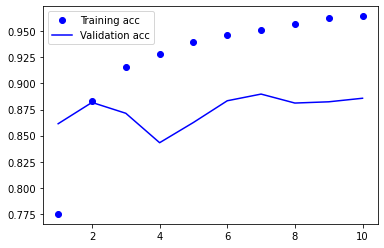

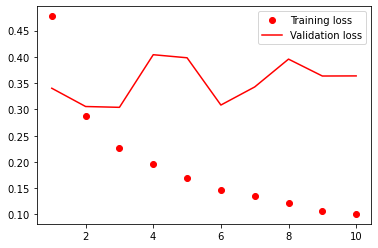

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()

plt.show()